In [1]:
import datetime as dt
from datetime import date
import os
import sys
import numpy as np
import pandas as pd
from glob import glob
import sqlalchemy
import pymysql
import time, datetime
from datetime import datetime, timedelta
from datetime import timedelta, date
import time
from numpy import sort
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kurtosis
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from yellowbrick.regressor import CooksDistance
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [35]:
base = pd.read_csv(r'base_dummy.csv', sep=',')
base = base.drop(columns=['Flag Atraso Transporte2_soma','Flag Atraso Fornecedor3_soma','Flag Atraso Coleta4_soma','Flag Atraso Cliente5_soma',
'[FLAG]Cancelado_soma','[FLAG]Recompra_ff_soma','[FLAG]Erro prazo transporte validacao_soma','[FLAG]Cross_soma','[FLAG]Atraso_criacao_OC_soma',
'[FLAG]Reprogramacao_OC_soma','[FLAG]Atraso Fornecedor_soma','[FLAG] Entregue_soma','[FLAG] Pratica_indevida_soma','[FLAG] Sac_pos_entrega_soma',
'[FLAG] Reversa_soma','[FLAG] PJ_soma','[FLAG] Mais de uma entrega_soma','[FLAG]Importacao WMS_soma','[FLAG] Recompra_soma','[FLAG] Entrega_Mista_soma',
'[FLAG] Virada_Faturamento_soma','FLAG - Infos_encontradas_soma','[FLAG] Atraso limite_soma','[FLAG] Oc sem bip_soma','[FLAG] Insucesso_soma',
'[FLAG] End. N.Localizado/Ausente_soma','[FLAG] Tempo Habil_soma','[FLAG] Atraso Redespacho_soma','[FLAG] Diarias_soma',
'[FLAG] Atraso Coletas_soma','[FLAG] Leves_soma','[FLAG] Atraso CD_soma','[FLAG] Recompra assistencia_soma','[FLAG] Recompra Total_soma',
'[FLAG] Atraso Cliente*_soma','FLAG_Parceiro_soma','[FLAG] - Detrator_mais_entrega_soma','[FLAG] - Categorias_detrator_soma',
'[FLAG] Private_Label_soma'
])
base.shape

# base.to_csv(r"D:\analise_corr()\analise_agora.csv", sep=',')


# colocar colunas q n tem 0 para funcionar
base['[FLAG]Cancelado_x'].fillna(method='ffill', inplace=True)

base.head()

,customer_answer,created_at,tipo_pedido_nps,tipo_venda,pv_pai,Atraso_Transp_s,Flag Atraso Fornecedor_s,Flag Atraso Coleta_s,Flag Atraso Cliente_s,[FLAG]Cancelado_S,[FLAG]Recompra_ff_S,[FLAG]Erro prazo transporte validacao_S,96.Atraso_importação_WMS_S,[FLAG]Cross_S,[FLAG]Atraso_criacao_OC_S,[FLAG]Reprogramacao_OC_S,92.Virada_ff_Vao_S,91.Erro de Prazo Transporte_S,[FLAG]Atraso Fornecedor_S,89.Reversa_S,NPS_NOTA_S,[FLAG] Entregue_S,[FLAG] Pratica_indevida_s,[FLAG] Sac_pos_entrega_s,[FLAG] Reversa_s,[FLAG] PJ_s,[FLAG] Mais de uma entrega_s,[FLAG]Importacao WMS_s,[FLAG] Recompra_s,[FLAG] Entrega_Mista_s,[FLAG] Virada_Faturamento_s,FLAG - Infos_encontradas_s,[FLAG] Atraso limite_s,[FLAG] Oc sem bip_s,[FLAG] Insucesso_s,[FLAG] End. N.Localizado/Ausente_s,[FLAG] Tempo Habil_s,[FLAG] Atraso Redespacho_s,[FLAG] Diarias_s,Flag Atraso Transporte2_x,Flag Atraso Fornecedor3_x,Flag Atraso Coleta4_x,Flag Atraso Cliente5_x,[FLAG]Cancelado_x,[FLAG]Recompra_ff_x,[FLAG]Erro prazo transporte validacao_x,96.Atraso_importação_WMS,[FLAG]Cross_x,[FLAG]Atraso_criacao_OC_x,[FLAG]Reprogramacao_OC_x,[FLAG]Atraso Fornecedor_x,NPS_NOTA,[FLAG] Entregue_x,[FLAG] Pratica_indevida_x,[FLAG] Sac_pos_entrega_x,[FLAG] Reversa_x,[FLAG] PJ_x,[FLAG] Mais de uma entrega_x,[FLAG]Importacao WMS_x,[FLAG] Recompra_x,[FLAG] Entrega_Mista_x,[FLAG] Virada_Faturamento_x,Info_Encontradas,FLAG - Infos_encontradas_x,[FLAG] Atraso limite_x,[FLAG] Oc sem bip_x,[FLAG] Insucesso_x,[FLAG] End. N.Localizado/Ausente_x,[FLAG] Tempo Habil_x,[FLAG] Atraso Redespacho_x,[FLAG] Diarias_x,[FLAG] Atraso Coletas_x,[FLAG] Leves_x,[FLAG] Atraso CD_x,[FLAG] Recompra assistencia_x,[FLAG] Recompra Total_x,[FLAG] Origem Recompra_x,[FLAG] Atraso Cliente*_x,FLAG_Parceiro_x,FLAG_terceiras_parceiras_x,[FLAG] - Detrator_mais_entrega_x,[FLAG] - Categorias_detrator_x,[FLAG] Private_Label_x,Guide_flag_x,[FLAG] Origem Recompra_soma,FLAG_terceiras_parceiras_soma,Guide_flag_soma
0,10,18/10/2022 12:19,Mista,1,28162012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,2,0,0,2,0,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,0,1,NaN,0,1.0,0,2,1,0.0,NaN,0,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,1,BULKY,0,0,0,-,0,BULKYBULKY,--
1,10,10/10/2022 13:40,1P,1,28096157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,0,0,NaN,0,NaN,0,0,0,0.0,NaN,0,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,1,BULKY,0,0,0,-,0,BULKY,-
2,10,18/10/2022 13:11,1P,1,27804324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,0,0,NaN,0,NaN,0,0,0,0.0,NaN,0,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,1,TERCEIRA,0,1,0,-,0,TERCEIRA,-
3,10,06/10/2022 12:35,1P,1,28032244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,0,0,NaN,0,NaN,0,0,0,0.0,NaN,0,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,1,BULKY,0,1,1,-,0,BULKY,-
4,10,27/10/2022 15:11,1P,1,28214644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN,0,0,NaN,0,NaN,0,0,0,0.0,NaN,0,0,0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,1,PARCEIRO,0,1,0,-,0,PARCEIRO,-


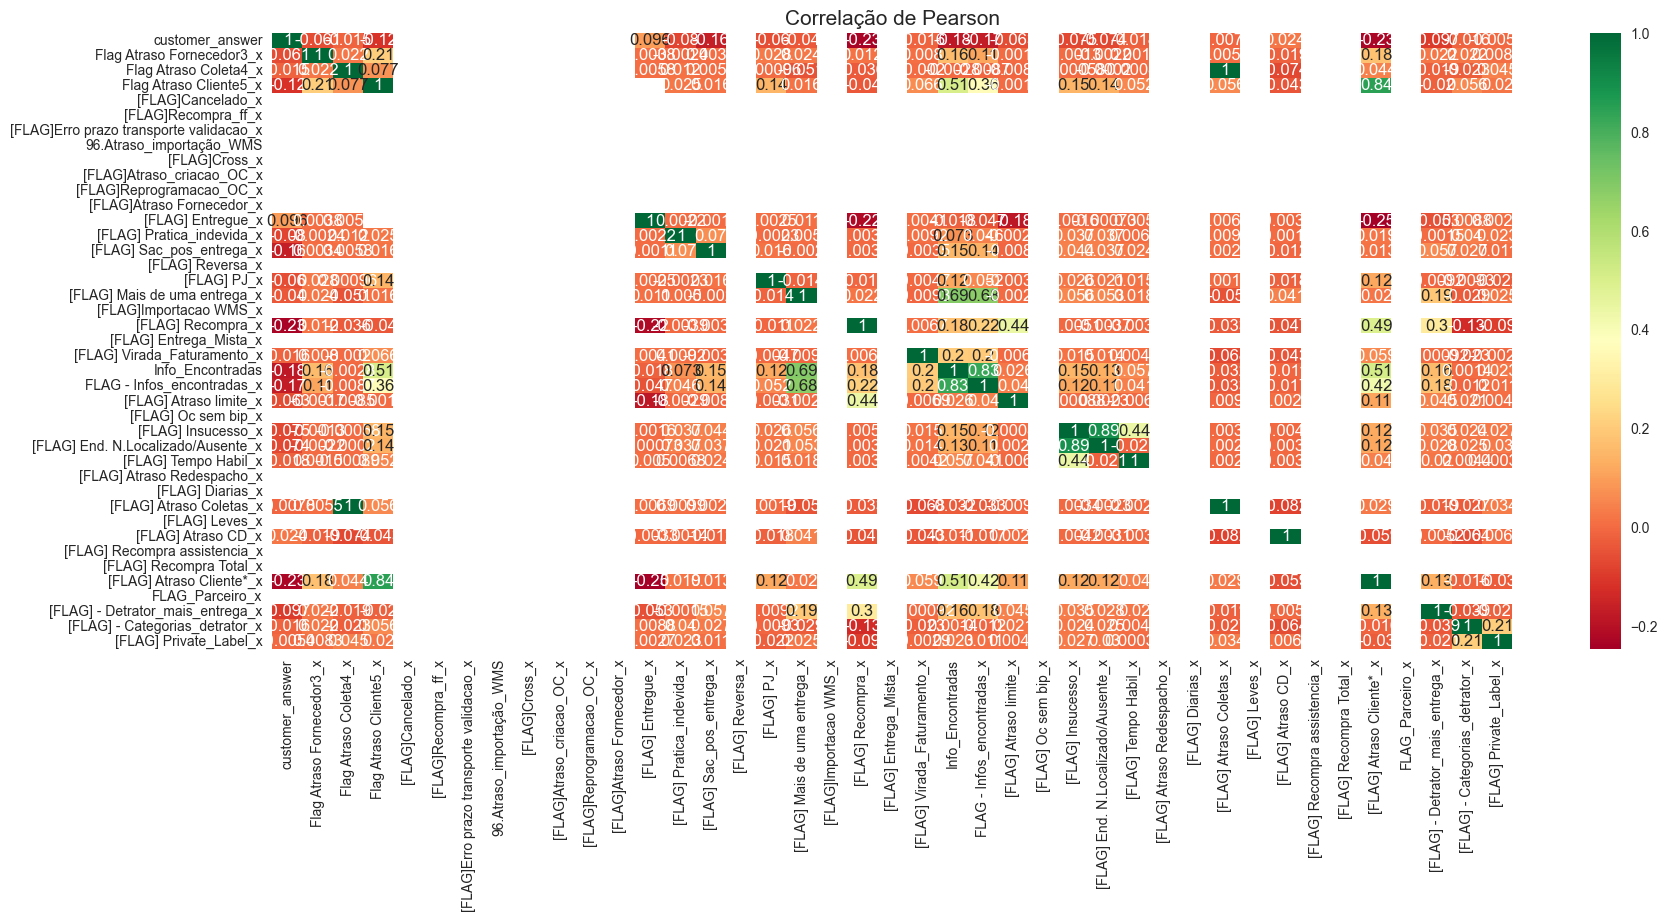

In [33]:

primeiras_flag = base.drop(columns=['FLAG_terceiras_parceiras_x','created_at','tipo_pedido_nps','tipo_venda','pv_pai','Atraso_Transp_s','Flag Atraso Fornecedor_s','Flag Atraso Coleta_s','Flag Atraso Cliente_s','[FLAG]Cancelado_S','[FLAG]Recompra_ff_S','[FLAG]Erro prazo transporte validacao_S','96.Atraso_importação_WMS_S','[FLAG]Cross_S','[FLAG]Atraso_criacao_OC_S','[FLAG]Reprogramacao_OC_S','92.Virada_ff_Vao_S','91.Erro de Prazo Transporte_S','[FLAG]Atraso Fornecedor_S','89.Reversa_S','NPS_NOTA_S','[FLAG] Entregue_S','[FLAG] Pratica_indevida_s','[FLAG] Sac_pos_entrega_s','[FLAG] Reversa_s','[FLAG] PJ_s','[FLAG] Mais de uma entrega_s','[FLAG]Importacao WMS_s','[FLAG] Recompra_s','[FLAG] Entrega_Mista_s','[FLAG] Virada_Faturamento_s','FLAG - Infos_encontradas_s','[FLAG] Atraso limite_s','[FLAG] Oc sem bip_s','[FLAG] Insucesso_s','[FLAG] End. N.Localizado/Ausente_s','[FLAG] Tempo Habil_s','[FLAG] Atraso Redespacho_s','[FLAG] Diarias_s','Flag Atraso Transporte2_x','NPS_NOTA','Guide_flag_soma'])
plt.figure(figsize=(20,8))
sns.heatmap(primeiras_flag.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação de Pearson',size=15);

In [30]:
#Variáveis independentes
x = primeiras_flag
#Variável dependentes
y = primeiras_flag['customer_answer']

modelo = LinearRegression()
modelo.fit(x, y)
LinearRegression()

ValueError: could not convert string to float: 'LR'